In [43]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [44]:
Stock = pd.read_excel(r"C:\Users\Yamin Hossain\Downloads\1729258-1613615-Stock_Price_data_set_(1).xlsx")
Stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [45]:
Stock.shape

(1009, 7)

In [46]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [47]:
Stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


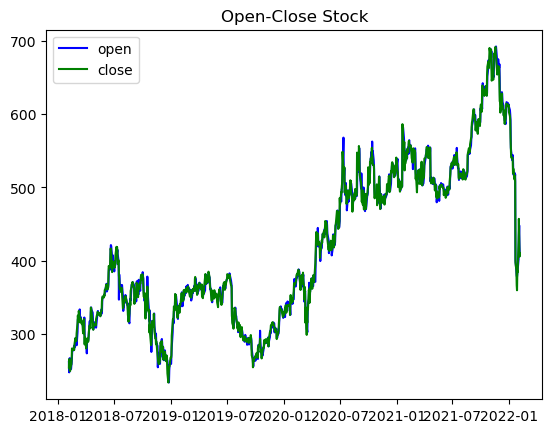

In [48]:
plt.plot(Stock['Date'],
         Stock['Open'],
         color="blue",
         label="open")
plt.plot(Stock['Date'],
         Stock['Close'],
         color="green",
         label="close")
plt.title("Open-Close Stock")
plt.legend()

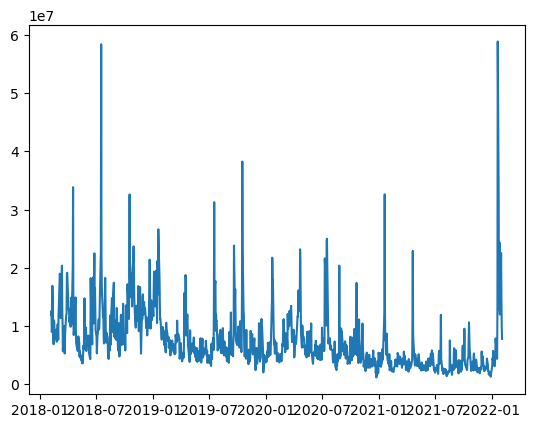

In [49]:
plt.plot(Stock['Date'],
         Stock['Volume'])
plt.show()

C:\Users\Yamin Hossain\AppData\Local\Temp\ipykernel_16512\352966719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Stock.corr(),


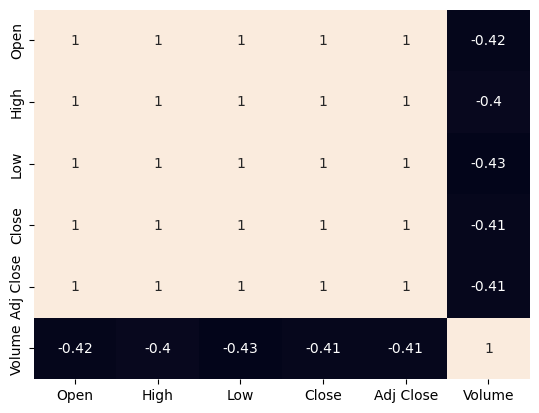

In [50]:
sns.heatmap(Stock.corr(),
            annot=True,
            cbar=False)
plt.show()

Text(0.5, 1.0, 'Stock Prices')

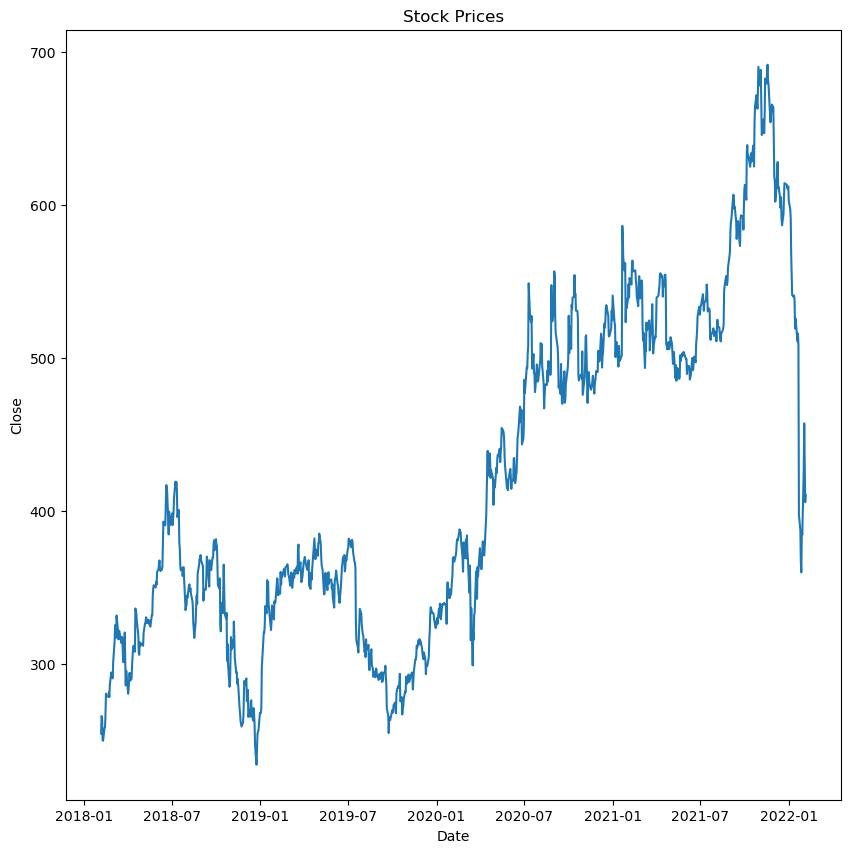

In [51]:
Stock['Date'] = pd.to_datetime(Stock['Date'])
prediction = Stock.loc[(Stock['Date']
                            > datetime(2018, 2, 5))
                            & (Stock['Date']
                            < datetime(2022, 2, 5))]
  
plt.figure(figsize=(10, 10))
plt.plot(Stock['Date'], Stock['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Stock Prices")

In [52]:
# prepare the training set samples
st_close = Stock.filter(['Close'])
dataset = st_close.values
training = int(np.ceil(len(dataset) *.95))
  
# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)
  
train_data = ss[0:int(training), :]
  
x_train = []
y_train = []
  
# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
  
x_train, y_train = np.array(x_train),\
                   np.array(y_train)
X_train = np.reshape(x_train,
                     (x_train.shape[0],
                      x_train.shape[1], 1))

In [53]:
# model = keras.models.Sequential()
# model.add(keras.layers.LSTM(units=128,
#                             return_sequences=True,
#                             input_shape
#                             =(X_train.shape[1], 1)))
# model.add(keras.layers.LSTM(units=128))
# model.add(keras.layers.Dense(256))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(1))
  
# print(model.summary())
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=128,
                            return_sequences=True,
                            input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(256))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
  
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 231,425
Trainable params: 231,425
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=RootMeanSquaredError())
  
history = model.fit(X_train, y_train,
                    epochs=20)

Epoch 1/20
29/29 [==============================] - 3s 55ms/step - loss: 0.2412 - root_mean_squared_error: 0.3542
Epoch 2/20
29/29 [==============================] - 2s 58ms/step - loss: 0.1418 - root_mean_squared_error: 0.1864
Epoch 3/20
29/29 [==============================] - 2s 61ms/step - loss: 0.1244 - root_mean_squared_error: 0.1632
Epoch 4/20
29/29 [==============================] - 2s 63ms/step - loss: 0.1184 - root_mean_squared_error: 0.1552
Epoch 5/20
29/29 [==============================] - 2s 64ms/step - loss: 0.1106 - root_mean_squared_error: 0.1477
Epoch 6/20
29/29 [==============================] - 2s 65ms/step - loss: 0.1091 - root_mean_squared_error: 0.1459
Epoch 7/20
29/29 [==============================] - 2s 61ms/step - loss: 0.1109 - root_mean_squared_error: 0.1467
Epoch 8/20
29/29 [==============================] - 2s 60ms/step - loss: 0.0987 - root_mean_squared_error: 0.1312
Epoch 9/20
29/29 [==============================] - 2s 58ms/step - loss: 0.0909 - root_m

In [55]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])
  
x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))
  
pred = model.predict(X_test)

2/2 [==============================] - 1s 14ms/step


C:\Users\Yamin Hossain\AppData\Local\Temp\ipykernel_16512\293635046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


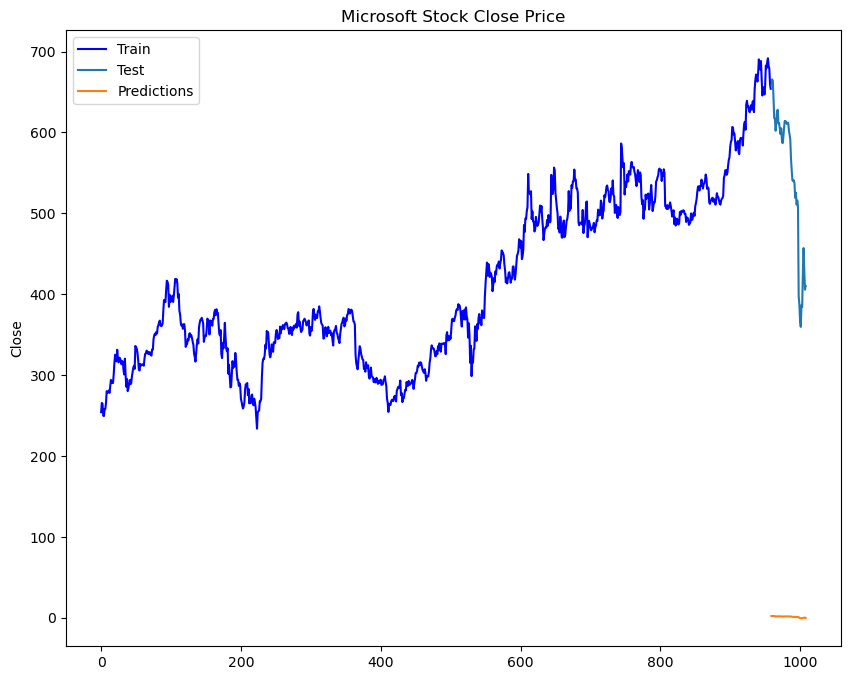

In [56]:
train = Stock[:training]
test = Stock[training:]
test['Predictions'] = pred
  
plt.figure(figsize=(10, 8))
plt.plot(train['Close'], c="b")
plt.plot(test[['Close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])